In [10]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 5)
sns.set_style('darkgrid')

## Soft-Margin Classifier

In [3]:
from sklearn.svm import LinearSVC

In [9]:
iris = datasets.load_iris()

# Get the petal length and width
X = iris["data"][:, (2, 3)]

# Get Virginica
y = (iris['target'] == 2).astype(np.float64)

<AxesSubplot:>

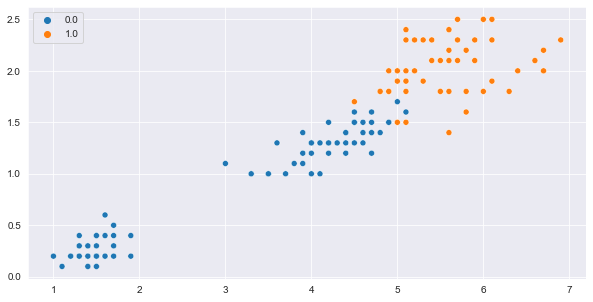

In [18]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

In [19]:
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge'))
])
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [24]:
svm_clf.predict([[2.0, 1.5]])

array([0.])

## Non-linear SVM Classification

In [25]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [30]:
X, y = make_moons(n_samples=100, noise=0.15)

polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge', max_iter=5000))
])

In [31]:
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', max_iter=5000))])

In [33]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])